In [11]:
#What is the distribution of happiness scores across the 148 countries over the years 2015 to 2023?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r'D:\2025 Data\World Happiness Index and Inflation Dataset\WHI_Inflation.csv', sep='\t')

# Display the first few rows to check the data
#df.head()
# Print all column names
print(df.columns)


Index(['Country', 'Year', 'Rank', 'Score', 'GDP per Capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption',
       'Energy Consumer Price Inflation', 'Food Consumer Price Inflation',
       'GDP deflator Index growth rate', 'Headline Consumer Price Inflation',
       'Official Core Consumer Price Inflation', 'Producer Price Inflation',
       'Continent'],
      dtype='object')


count    1203.000000
mean        5.503177
std         1.138402
min         1.859000
25%         4.624300
50%         5.546000
75%         6.346150
max         7.842000
Name: Score, dtype: float64


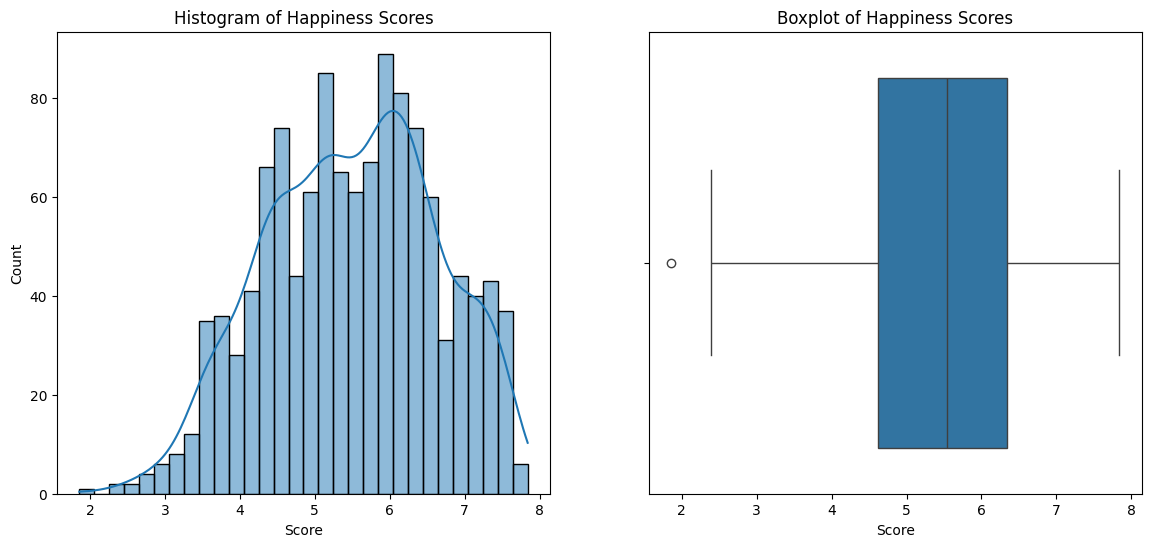

In [2]:
# Summary statistics for Happiness Score
print(df['Score'].describe())

# Plot histogram and boxplot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Score'], bins=30, kde=True)
plt.title('Histogram of Happiness Scores')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Score'])
plt.title('Boxplot of Happiness Scores')

plt.show()


In [3]:
# How does GDP per capita correlate with the happiness score?

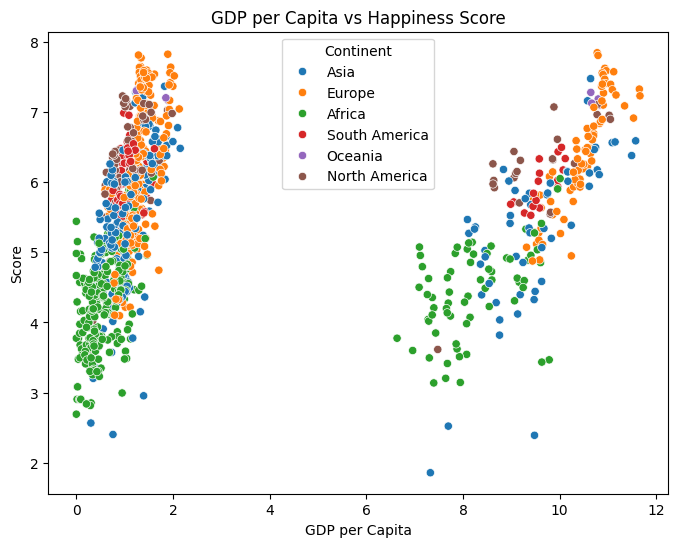

Correlation between GDP per Capita and Happiness Score:0.17


In [4]:
# Scatter plot to visualize the relationship 

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='GDP per Capita',y='Score', hue='Continent')
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend(title='Continent')
plt.show()

# Calculate correlation coefficienr

correlation = df['GDP per Capita'].corr(df['Score'])
print('Correlation between GDP per Capita and Happiness Score:{:.2f}' .format(correlation))

In [5]:
# What trends can be observed in inflation rates across different continents, and how might these trends relate to happiness scores?

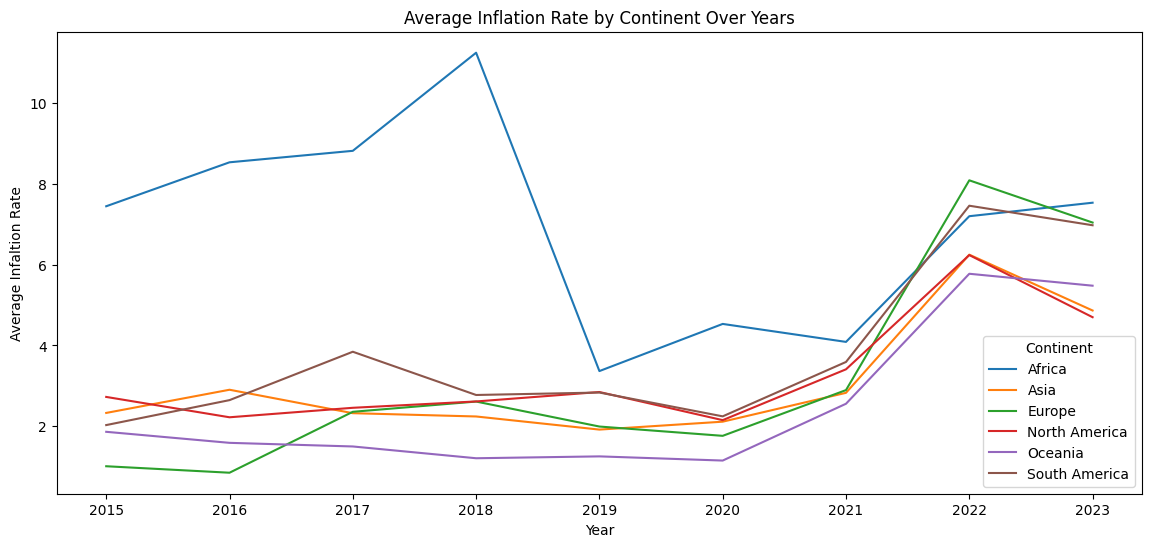

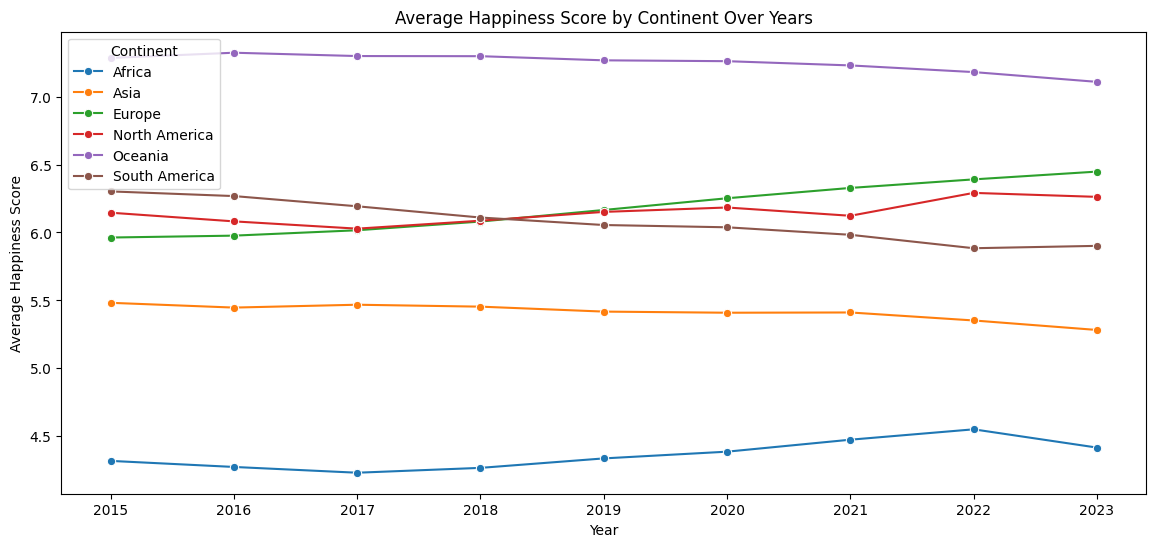

In [6]:
# Group by Continent and Year to get average inflation rates and happiness scores
groupby = df.groupby(['Continent', 'Year'])[['Official Core Consumer Price Inflation', 'Score']].mean()

# Plot inflation trends by continent 
plt.figure(figsize=(14,6))
sns.lineplot(data=groupby, x='Year', y='Official Core Consumer Price Inflation', hue='Continent', markers='o')
plt.title('Average Inflation Rate by Continent Over Years')
plt.xlabel('Year')
plt.ylabel('Average Infaltion Rate')
plt.show()

# Plot happiness score trends by continet for context
plt.figure(figsize=(14, 6))
sns.lineplot(data=groupby, x='Year', y='Score', hue='Continent', marker='o')
plt.title('Average Happiness Score by Continent Over Years')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.show()






In [7]:
# Which countries have experienced significant changes (improvement or decline) in happiness scores over time?b

In [8]:
# Pivot table: rows as Country, columns as Year, values as Happiness Score
pivot_table = df.pivot_table(index='Country', columns='Year', values='Score')

# Calculate the change from the first year to the last year
pivot_table['Change']= pivot_table[2023] - pivot_table[2015]
print(pivot_table['Change'].sort_values(ascending=False).head(10))
print(pivot_table['Change'].sort_values().head(10))

Country
Romania         1.465
Guinea          1.416
Togo            1.298
Bulgaria        1.248
Hungary         1.241
Honduras        1.235
Gabon           1.139
Latvia          1.115
Greece          1.074
Burkina Faso    1.051
Name: Change, dtype: float64
Country
Lebanon        -2.447
Afghanistan    -1.716
Zimbabwe       -1.406
Sierra Leone   -1.369
Zambia         -1.147
Jordan         -1.072
Botswana       -0.897
Brazil         -0.858
Mexico         -0.857
Colombia       -0.847
Name: Change, dtype: float64


In [9]:
# What is the impact of social factors (freedom, social support, generosity) on the happiness score?

Correlations with Happiness Score:
Freedom to make life choices    0.400606
Social support                  0.561070
Generosity                      0.050584
Name: Score, dtype: float64


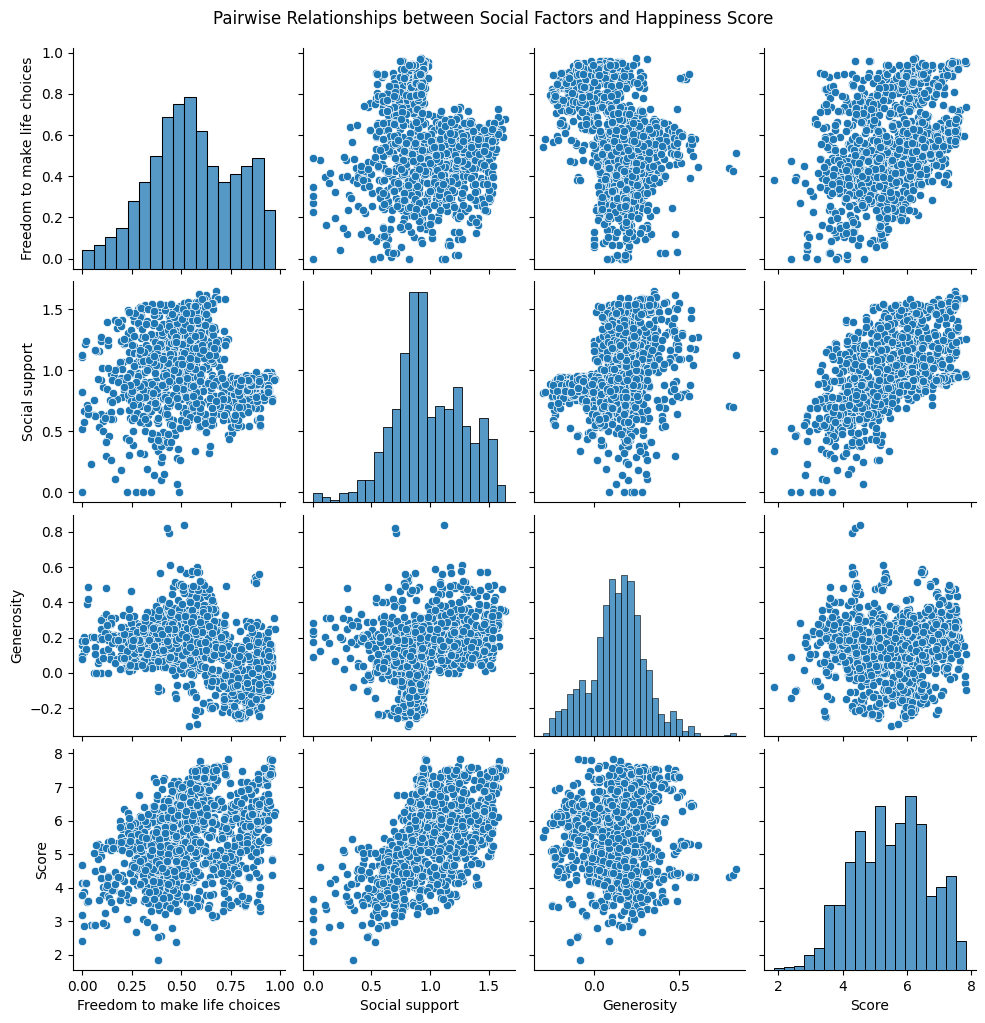

In [ ]:
# Compute correlations between social factors and Happiness Score
social_factors = ['Freedom to make life choices', 'Social support', 'Generosity']
correlations = df[social_factors + ['Score']].corr()['Score'].drop('Score')
print("Correlations with Happiness Score:")
print(correlations) 

# Visualize using pairplot
sns.pairplot(df[social_factors + ['Score']])
plt.suptitle('Pairwise Relationships between Social Factors and Happiness Score', y=1.02)
plt.show()